<h1> Complex project </h1>

**Project description**


You work in the Strimchik online store, which sells computer games all over the world. Historical data on game sales, user and expert ratings, genres and platforms (for example, Xbox or PlayStation) are available from open sources. You need to identify patterns that determine the success of the game. This will allow you to place a bet on a potentially popular product and plan advertising campaigns.
Here is data up to 2016. Let's imagine it's December 2016 and you're planning a campaign for 2017. It is necessary to work out the principle of working with data. It doesn't matter whether you forecast sales for 2017 based on 2016 data or 2027 sales based on 2026 data.
The data set contains the abbreviation ESRB (Entertainment Software Rating Board) - this is an association that determines the age rating of computer games. The ESRB evaluates game content and assigns it an appropriate age rating, such as Mature, Young Children, or Teen.

P.s initially the project was executed in Russian, and only then it was translated into English using an auto-translator, so errors or untranslated sections are possible.

**Description of data**


- Name — the name of the game
- Platform - platform
- Year_of_Release — year of release
- Genre - game genre
- NA_sales - sales in North America (millions of copies sold)
- EU_sales - sales in Europe (millions of copies sold)
- JP_sales - sales in Japan (millions of copies sold)
- Other_sales - sales in other countries (millions of copies sold)
- Critic_Score - critics' score (maximum 100)
- User_Score - user rating (maximum 10)
- Rating - rating from the ESRB organization

<h2> First view </h2> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
print(f'Size of dataset: {data.shape[0]} x {data.shape[1]} ')
data.info()

Size of dataset: 16715 x 11 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
for column in data.columns:
    print(column, (data[column].isna().sum()*100/16715).round(decimals = 2), end = '%\n')

Name 0.01%
Platform 0.0%
Year_of_Release 1.61%
Genre 0.01%
NA_sales 0.0%
EU_sales 0.0%
JP_sales 0.0%
Other_sales 0.0%
Critic_Score 51.32%
User_Score 40.09%
Rating 40.48%


<ul>
    <span style="color:red">
        <li> Name (rename)</li>
        <li> Platform (rename) </li>
        <li> Year_of_Release (rename + change data type)</li>
        <li> Genre (rename) </li>
    </span><span style="color:green">
        <li> NA_sales ✔️ </li>
        <li> EU_sales ✔️ </li>
        <li> JP_sales ✔️ </li>
    </span><span style="color:red">
        <li> Other_sales (rename) </li>
        <li> Critic_Score (rename + see what to fill in the gaps with) </li>
        <li> User_Score (rename + see how to fill in the blanks + change data type) </li>
        <li> Rating (rename) </li>
    </span>
</ul>

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


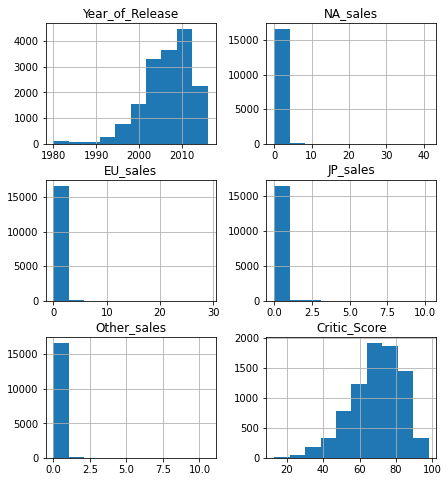

In [5]:
display(data.describe())
data.hist(figsize=(7, 8));


<h2> Preprocessing </h2>

In [6]:
data.duplicated().sum()

0

There are no obvious duplicates

Let's check for implicit duplicates

In [7]:
data[data.duplicated(subset = ['Name', 'Platform'], keep = False)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Lines where the name of the game or the year of release are omitted will be deleted in the future, so we will not pay attention to them now. As for the Need for Speed ​​series, these are not duplicates, but cross-platform games of the same name, released in different years. The only game left is Madden NFL 13. It is duplicated in everything except sales. Let's delete the copy from the table.

In [8]:
data = data.drop(index = 16230)

<h3> Rename </h3>

In [9]:
columnns_to_rename = ['Name', 'Platform', 'Year_of_Release', 'Genre', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating']
for column in columnns_to_rename:
    data = data.rename(columns = {column : column.lower()})

In [10]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

<ul>
    <span style="color:green">
        <li> name ✔️</li>
        <li> platform ✔️ </li>
    </span><span style="color:red">
        <li> year_of_release (change of data type)</li>
    </span><span style="color:green">
        <li> genre ✔️ </li>
    </span><span style="color:green">
        <li> NA_sales ✔️ </li>
        <li> EU_sales ✔️ </li>
        <li> JP_sales ✔️ </li>
        <li> other_sales ✔️ </li>
        </span><span style="color:red">
        <li> critic_Score (see how to fill in the blanks) </li>
        <li> user_Score (see how to fill in the blanks + change the data type) </li>
    </span><span style="color:green">
        <li> rating ✔️ </li>
    </span>
</ul>

<h3> Change data types </h3>

In [11]:
columnns_to_type_change = ['year_of_release',  'user_score']

In [12]:
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


tbd = to be determined (= Nan)

In [14]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.NaN
data.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [15]:
num_user_score = data.user_score.dropna().astype('float')
num_user_score.head()

0    8.0
2    8.3
3    8.0
6    8.5
7    6.6
Name: user_score, dtype: float64

In [16]:
data['num_user_score'] = num_user_score
data.corr()

,year_of_release,NA_sales,EU_sales,JP_sales,other_sales,critic_score,num_user_score
year_of_release,1.000000,-0.092485,0.003993,-0.168357,0.037836,0.011268,-0.267745
NA_sales,-0.092485,1.000000,0.765334,0.449591,0.638648,0.240821,0.086150
EU_sales,0.003993,0.765334,1.000000,0.435059,0.722791,0.220805,0.055295
JP_sales,-0.168357,0.449591,0.435059,1.000000,0.291086,0.152629,0.125577
other_sales,0.037836,0.638648,0.722791,0.291086,1.000000,0.198603,0.057080
critic_score,0.011268,0.240821,0.220805,0.152629,0.198603,1.000000,0.581122
num_user_score,-0.267745,0.086150,0.055295,0.125577,0.057080,0.581122,1.000000


After looking at the relationship of the `num_user_score` column with other values, we could not find a way to handle the gaps. We'll have to leave it as it is.

In [17]:
data = data.drop(columns = ['num_user_score'])
data.head()

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16714 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16714 non-null  object 
 2   year_of_release  16445 non-null  float64
 3   genre            16712 non-null  object 
 4   NA_sales         16714 non-null  float64
 5   EU_sales         16714 non-null  float64
 6   JP_sales         16714 non-null  float64
 7   other_sales      16714 non-null  float64
 8   critic_score     8136 non-null   float64
 9   user_score       7589 non-null   object 
 10  rating           9948 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


<ul>
    <span style="color:green">
        <li> name ✔️</li>
        <li> platform ✔️ </li>
    </span><span style="color:red">
        <li> year_of_release (change of data type)</li>
    </span><span style="color:green">
        <li> genre ✔️ </li>
    </span><span style="color:green">
        <li> NA_sales ✔️ </li>
        <li> EU_sales ✔️ </li>
        <li> JP_sales ✔️ </li>
        <li> other_sales ✔️ </li>
        <li> critic_Score ✔️ </li>
        <li> user_Score ✔️ </li>
    </span><span style="color:green">
        <li> rating ✔️ </li>
    </span>
</ul>

In [19]:
data = data.dropna(subset = ["year_of_release"])
data = data.reset_index(drop = True)

In [20]:
data.year_of_release = data.year_of_release.astype('int')
data.user_score = data.user_score.astype('float')

<ul>
    <span style="color:green">
        <li> name  ✔️</li>           
        <li> platform  ✔️ </li>      
        <li> year_of_release ✔️</li> 
    </span><span style="color:green">    
        <li> genre ✔️  </li>
    </span><span style="color:green">    
        <li> NA_sales  ✔️       </li>
        <li> EU_sales   ✔️       </li>
        <li> JP_sales     ✔️     </li>
        <li> other_sales      ✔️  </li>
        <li> critic_Score    ✔️   </li>
        <li> user_Score      ✔️  </li>
    </span><span style="color:green">     
        <li> rating          ✔️     </li>
    </span>
</ul>

In [21]:
data.loc[data.name.isna() == True]

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Let's discard these lines

In [22]:
data = data.dropna(subset = ["name"])
data = data.reset_index(drop = True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   NA_sales         16443 non-null  float64
 5   EU_sales         16443 non-null  float64
 6   JP_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


<h3> Analysis of gaps </h3>

Let's think about the possible reasons for the omissions.

Let’s display two graphs reflecting the absolute and relative number of gaps in lines depending on the release date (in other words, let’s check the assumption that older games often lack information about user ratings and age genre)

Relative skip rate

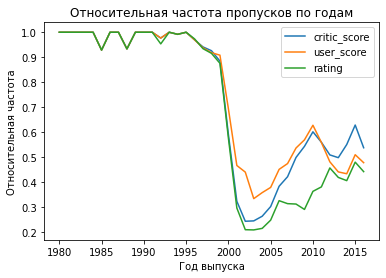

In [24]:
data.groupby('year_of_release')[['critic_score', 'user_score', 'rating']].apply(lambda x: x.isna().sum()/x.isna().count()).plot();
plt.xlabel('Год выпуска');
plt.ylabel('Относительная частота');
plt.title('Относительная частота пропусков по годам');

Absolute skip rate

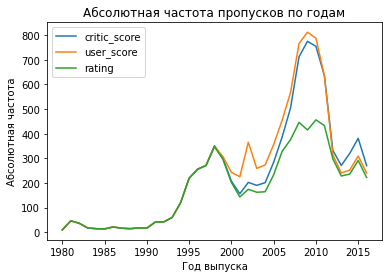

In [25]:
data.groupby('year_of_release')[['critic_score', 'user_score', 'rating']].apply(lambda x: x.isna().sum()).plot();
plt.xlabel('Год выпуска');
plt.ylabel('Абсолютная частота');
plt.title('Абсолютная частота пропусков по годам');

In [26]:
data.query('year_of_release <= 1999').shape[0]*100/data.shape[0]

12.005108556832695

We can indeed say that almost all old games (released before 2000) have missing data on ratings and ratings, but old games make up only a small part (about 12%) of the total sample => the main reason for the missing data is something else .

<h3> Total sales </h3>

In order to judge the popularity of a game, it is important to know not only its individual sales by region, but also the overall purchase rate as a whole. Let's add a column with total game sales

In [27]:
data['sales_total'] = data['NA_sales']+data['EU_sales']+data['JP_sales']+data['other_sales']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   NA_sales         16443 non-null  float64
 5   EU_sales         16443 non-null  float64
 6   JP_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  sales_total      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [28]:
data.head()

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,sales_total
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<h3> Output from preprocessing </h3>

For the most part, the dataset remained unchanged. In 2 columns, the data type was replaced with a more suitable one, almost all columns were renamed for more convenient work with them, a small part of the gaps was discarded (a little more than 1.5% of the total). We were able to find the reason for some of the omissions in the columns with reviews and age ratings (older games almost always lack this data). Added a column with total sales worldwide. What wasn't done:

It was planned to fill in the gaps in the columns with user and critic ratings, but it was not possible to find a suitable replacement method (the only thing that came to mind was to write a code that would make a request for the name of the game and send data with ratings back. Such data can be It would be possible to obtain it from publicly available resources (for example, Wikipedia), but I do not have the necessary skills for this. In the same way, it would be possible to fill in the gaps in the age rating.)

In [29]:
data = data.rename(columns = {'year_of_release' : 'year'})

<h2> Data analysis </h2>

<h3> Game releases by year </h3>

Let's start with something simple. Let's see how many games were released over the years

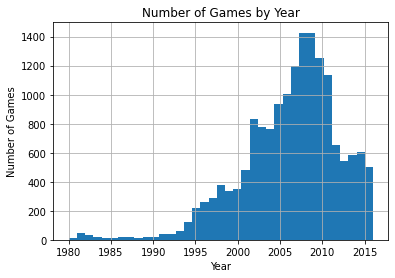

In [31]:
data.year.hist(bins = (data.year.max() - data.year.min()+1));
plt.xlabel('Year');
plt.ylabel('Number of Games');
plt.title('Number of Games by Year');

We see that every year until 2010 the number of released games grew steadily, but then there was an almost halving decline until 2016. Most likely, from 2010 to 2015, developers changed the main technologies (for example, updated game engines) or, conversely, waited until the market for game consoles and PCs reaches the required technological level.

It is also logical to assume that most of the games from 2005 to 2010 were not produced by large studios, but, on the contrary, by small teams of indie developers (perhaps at that moment applications for creating games became widely popular, allowing you to put together an indie game on your knees in a couple of weeks (to Unfortunately, I don’t see a way to verify this assumption using the available data, but a quick search on the Internet confirms this guess))

In addition, we can now say that the data up to ~1995 is of little interest to us, since very few games were released in those years, and as we previously found out, the information content of this data is minimal (can be left only for viewing platforms popular at that time and genres)

<h3> Sales by platform </h3>

In [32]:
top_platforms = data.groupby('platform').sum().sort_values('sales_total', ascending=False)
top_platforms.sales_total.head(5)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
Name: sales_total, dtype: float64

We have received a list of the top 5 platforms by total game sales

In [33]:
top_platforms_data = data[data['platform'].isin(top_platforms.head(5).index)]

In [34]:
platforms_by_year_sales = top_platforms_data.groupby(['year', 'platform'])['sales_total'].sum().unstack()

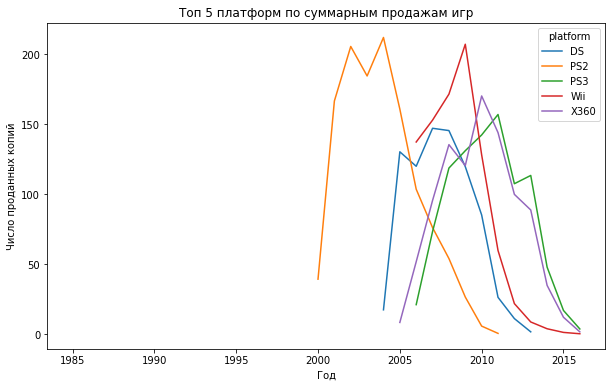

In [35]:
platforms_by_year_sales.plot(figsize=(10, 6));
plt.xlabel('Год');
plt.ylabel('Число проданных копий');
plt.title('Топ 5 платформ по суммарным продажам игр');

1. We can immediately notice that on average these platforms have been very popular for about 5 years
2. In general, the platform has existed for about 10 years
3. There is a clear difference between DS and PS2. The number of games released annually on PS2 is ~1.5 times less than on DS, but sales volume on PS2 is significantly higher. This suggests that the PS2 was popular due to the quality of games, not quantity
4. The sharp popularity of the Wii immediately after its release is striking. Most likely the result of a good advertising campaign

<h3> Current period </h3>

As was previously said, successful platforms live for about 10 years, less popular ones for about 7 => by taking data from 2014 to 2015 (apparently the data for 2016 is not complete, so a decline is visible at the end) we can understand which platform is better to invest in( In this way, we do not miss other popular platforms and see those that are just gaining momentum)

In [37]:
recent_data = data[(data['year'] >= 2014) & (data['year'] <= 2016)]
platforms_by_year_actual_sum = recent_data.groupby(['year', 'platform'])['sales_total'].sum().unstack()

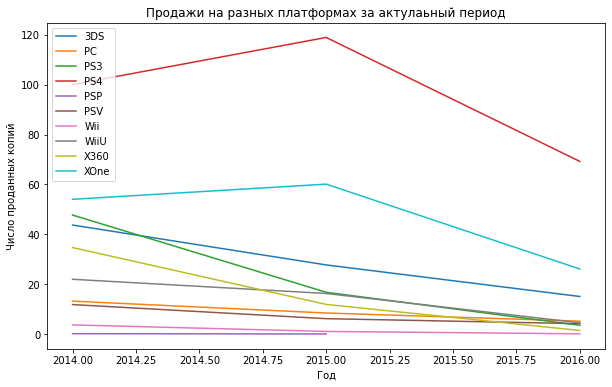

In [38]:
platforms_by_year_actual_sum.plot(figsize=(10, 6));
plt.legend(loc='upper left');
plt.xlabel('Год');
plt.ylabel('Число проданных копий');
plt.title('Продажи на разных платформах за актулаьный период');

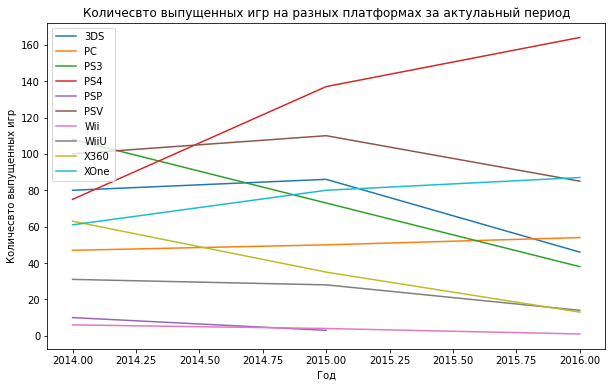

In [39]:
platforms_by_year_actual_count = recent_data.groupby(['year', 'platform']).size().unstack()
platforms_by_year_actual_count.plot(figsize=(10, 6));
plt.legend(loc='upper left');
plt.xlabel('Год');
plt.ylabel('Количесвто выпущенных игр');
plt.title('Количесвто выпущенных игр на разных платформах за актулаьный период');

In [40]:
top_platforms = ['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']

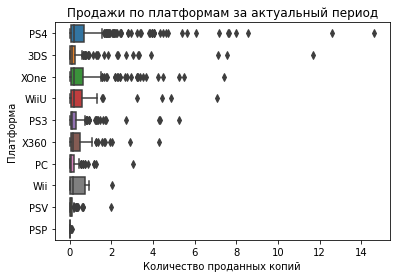

In [41]:
sns.boxplot(data = recent_data.query('platform in @top_platforms'), x = 'sales_total', y = 'platform');
plt.xlabel('Количество проданных копий');
plt.ylabel('Платформа');
plt.title('Продажи по платформам за актуальный период');

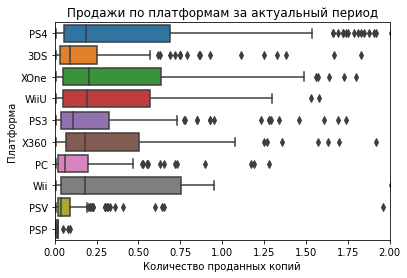

In [42]:
sns.boxplot(data = recent_data.query('platform in @top_platforms'), x = 'sales_total', y = 'platform').set_xlim([0, 2])
plt.xlabel('Количество проданных копий');
plt.ylabel('Платформа');
plt.title('Продажи по платформам за актуальный период');
plt.show();

1. It is clearly visible how the popularity of the PS3 and Xbox360 is falling (This can be seen both in the decrease in total sales on the console and in the cessation of release of games on them)
2. Wii, PSP, WiiU will obviously disappear completely in the near future
3. The beginning of a new generation of consoles in the form of Xbox ONE and PS4 is clearly visible (perhaps they should be given the highest priority when planning an advertising campaign)
4. Platforms such as 3DS, PSV are also losing their relevance
5. The popularity of games on PC, as well as sales, look stable every year, so an advertising campaign for this platform also makes sense

<h3> Correlation between reviews and sales </h3>

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16442
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1689 non-null   object 
 1   platform      1689 non-null   object 
 2   year          1689 non-null   int64  
 3   genre         1689 non-null   object 
 4   NA_sales      1689 non-null   float64
 5   EU_sales      1689 non-null   float64
 6   JP_sales      1689 non-null   float64
 7   other_sales   1689 non-null   float64
 8   critic_score  718 non-null    float64
 9   user_score    888 non-null    float64
 10  rating        940 non-null    object 
 11  sales_total   1689 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 171.5+ KB


To see how reviews from critics and users affect sales within the platform, let’s choose PS3 and PS4. The PS3 platform is in the top 3 in popularity of all time, a huge number of games have been released on it, and the platform is also relatively relevant (for example, with the already outdated PS2, which, although it is the leader in popularity, is much older than the PS3). Let’s take PS4 because the platform is clearly emerging as a new leader, but has not yet managed to gain the necessary popularity due to its novelty, so its study will help to understand how the quality of released games influences the development of the platform.

In [46]:
platforms = ['PS3', 'PS4']
for platform in platforms:
    current_correlation_data = data[data['platform'] == platform]
    print(f'Платформа: {platform}\nКорреляция с отзывами игроков: {current_correlation_data.user_score.corr(current_correlation_data.sales_total)}\nКорреляция с отзывами критиков: {current_correlation_data.critic_score.corr(current_correlation_data.sales_total)}')


Платформа: PS3
Корреляция с отзывами игроков: -0.16676141347662118
Корреляция с отзывами критиков: 0.44657460493190704
Платформа: PS4
Корреляция с отзывами игроков: -0.040131589472697356
Корреляция с отзывами критиков: 0.40266141068104083


The results indicate in both cases that there is no linear relationship between player reviews and game sales, and also a weak relationship between critical reviews and sales.

In [48]:
platforms = data.platform.unique().tolist()
for platform in platforms:
    current_correlation_data = data[data['platform'] == platform]
    user_corr = current_correlation_data.user_score.corr(current_correlation_data.sales_total)
    critic_corr = current_correlation_data.critic_score.corr(current_correlation_data.sales_total)
    if user_corr > -1:
        print(f'Платформа: {platform}\nКорреляция с отзывами игроков: {user_corr}\nКорреляция с отзывами критиков: {critic_corr}')

Платформа: PS4
Корреляция с отзывами игроков: -0.040131589472697356
Корреляция с отзывами критиков: 0.40266141068104083
Платформа: 3DS
Корреляция с отзывами игроков: 0.2151932718527028
Корреляция с отзывами критиков: 0.314117492869051
Платформа: XOne
Корреляция с отзывами игроков: -0.0703839280647581
Корреляция с отзывами критиков: 0.42867694370333226
Платформа: WiiU
Корреляция с отзывами игроков: 0.40792645792170773
Корреляция с отзывами критиков: 0.370201412480884
Платформа: PS3
Корреляция с отзывами игроков: -0.16676141347662118
Корреляция с отзывами критиков: 0.44657460493190704
Платформа: X360
Корреляция с отзывами игроков: -0.138444570945665
Корреляция с отзывами критиков: 0.5257228356581523
Платформа: PC
Корреляция с отзывами игроков: -0.07159665703472451
Корреляция с отзывами критиков: 0.17463413769350036
Платформа: Wii
Корреляция с отзывами игроков: 1.0
Корреляция с отзывами критиков: nan
Платформа: PSV
Корреляция с отзывами игроков: -0.16845504978064446
Корреляция с отзывами 

In [50]:
platforms = ['PS4', 'PS3', 'XOne', 'X360', 'PC']

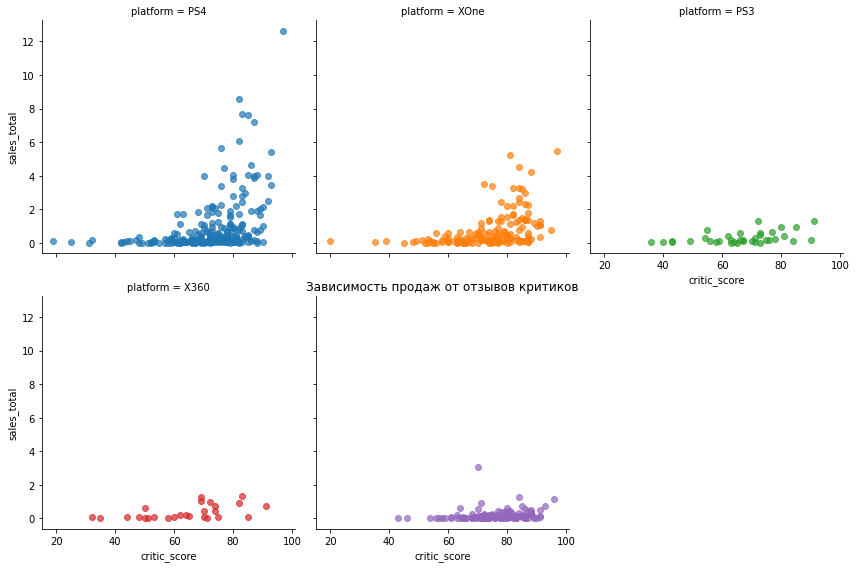

In [51]:
g = sns.FacetGrid(data[data['platform'].isin(platforms)], col='platform', hue='platform', col_wrap=3, height=4)
g = g.map(plt.scatter, 'critic_score', 'sales_total', alpha=0.7)
plt.title('Зависимость продаж от отзывов критиков');
plt.show();

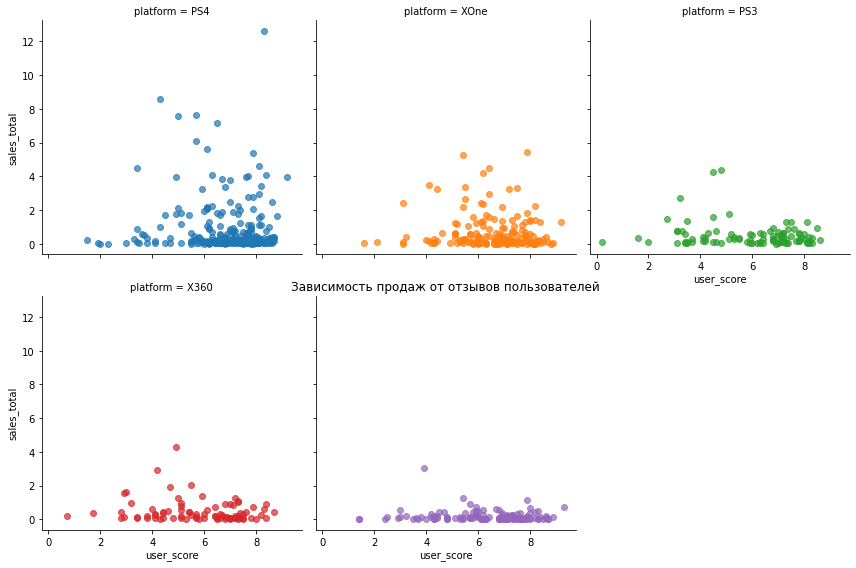

In [52]:
g = sns.FacetGrid(data[data['platform'].isin(platforms)], col='platform', hue='platform', col_wrap=3, height=4)
g = g.map(plt.scatter, 'user_score', 'sales_total', alpha=0.7)
plt.title('Зависимость продаж от отзывов пользователей');
plt.show();

The obtained values ​​generally confirm earlier conclusions, with rare exceptions. However, none of the obtained values ​​exceeds the statistical significance level to make any predictions.

<h3> Sales analysis by genre
</h3>

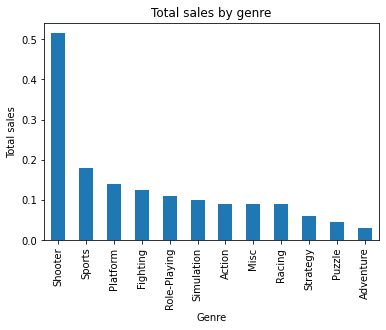

In [53]:
data.groupby('genre').sales_total.median().sort_values(ascending = False).plot(kind= 'bar');
plt.title("Total sales by genre")
plt.xlabel("Genre")
plt.ylabel("Total sales")
plt.show()

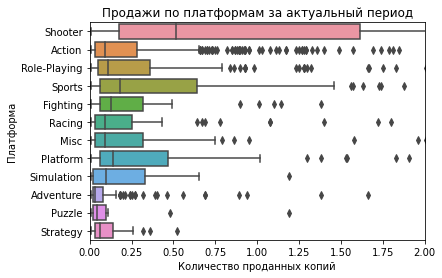

In [54]:
sns.boxplot(data = data.sort_values('sales_total',ascending = False), x = 'sales_total', y = 'genre').set_xlim([0, 2])
plt.xlabel('Количество проданных копий');
plt.ylabel('Платформа');
plt.title('Продажи по платформам за актуальный период');
plt.show();

The most popular genres were shooters, sports, platformers, fighting games and RPGs. Often such games (with the exception of platformers) are large AAA projects, so such an observation is quite expected. We also see that strategy, puzzle and adventure games are the least popular. We also note that total sales of shooters are far ahead of all other genres.

<h3> Sales of games by region </h3>

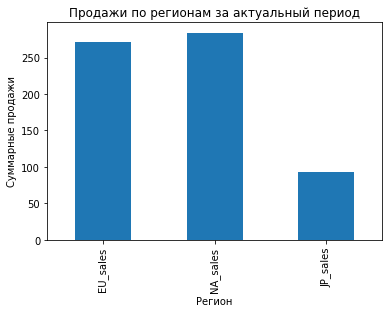

In [55]:
data[['EU_sales', 'NA_sales', 'JP_sales']].sum().plot(kind= 'bar');
plt.xlabel('Регион');
plt.ylabel('Суммарные продажи');
plt.title('Продажи по регионам за актуальный период');
plt.show();

<h2> Portrait by region </h2>

<h3> Platforms</h3>

In [56]:
top_platforms = data.groupby('platform').sum().sort_values('sales_total', ascending=False)
NA_platforms = top_platforms.sort_values('NA_sales', ascending = False)
NA_platforms_top = NA_platforms.head(5)
NA_other = NA_platforms.iloc[5:].NA_sales.sum()
NA_stat = pd.concat([NA_platforms_top, pd.DataFrame({'platform': ['Other'], 'NA_sales': [NA_other]})])
NA_stat = NA_stat.rename({0:'Other'})


EU_platforms = top_platforms.sort_values('EU_sales', ascending = False)
EU_platforms_top = EU_platforms.head(5)
EU_other = EU_platforms.iloc[5:].EU_sales.sum()
EU_stat = pd.concat([EU_platforms_top, pd.DataFrame({'platform': ['Other'], 'EU_sales': [EU_other]})])
EU_stat = EU_stat.rename({0:'Other'})


JP_platforms = top_platforms.sort_values('JP_sales', ascending = False)
JP_platforms_top = JP_platforms.head(5)
JP_other = JP_platforms.iloc[5:].JP_sales.sum()
JP_stat = pd.concat([JP_platforms_top, pd.DataFrame({'platform': ['Other'], 'JP_sales': [JP_other]})])
JP_stat = JP_stat.rename({0:'Other'})

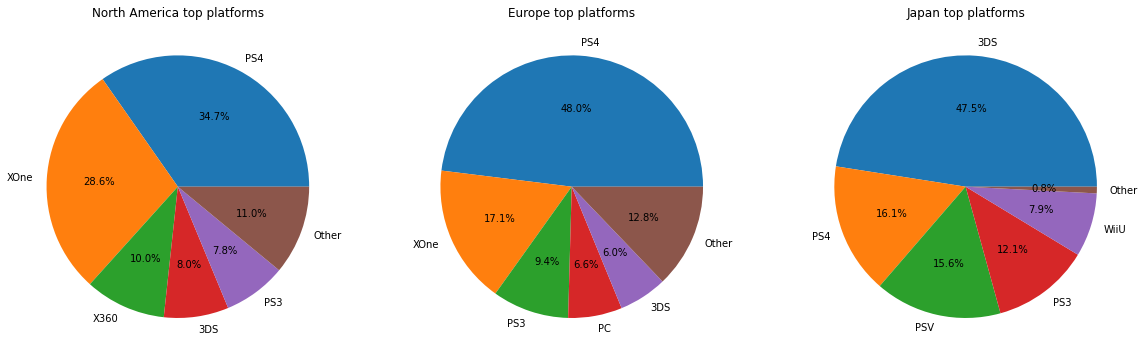

In [57]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.pie(NA_stat['NA_sales'], autopct='%1.1f%%', labels = NA_stat.index.tolist())
ax1.set_title("North America top platforms")
ax2.pie(EU_stat['EU_sales'], autopct='%1.1f%%', labels = EU_stat.index.tolist())
ax2.set_title("Europe top platforms")
ax3.pie(JP_stat['JP_sales'], autopct='%1.1f%%', labels = JP_stat.index.tolist())
ax3.set_title("Japan top platforms")
fig.set_size_inches(20, 15)

XBox 360, XOne, PS3 and PS4, 3DS are the most popular platforms in the USA. All except the half-day one are game consoles of the 7th and 8th generation. The Nintendo 3DS is the only portable console on this list. PS4 and XOne share the market almost equally and occupy almost 2/3, the rest is shared by consoles of previous generations and other platforms

In Europe, the top platforms look almost the same, with the exception of the X360, which was supplanted by the PC. PS4 occupies almost 50% of the market, followed by its main competitor - XOne, which, however, has not found such popularity in the region and occupies only 17%. PC has almost 7%, the rest is shared by platforms of previous generations and other consoles.

But the list of top platforms in Japan is very different from the rest. Firstly, the main competitor of the domestic manufacturer, the XBox line of consoles, is completely absent. Secondly, in first place by a noticeable margin is the Nintendo 3DS, occupying 47.5% of the market, then the Sony product line: PS4, PSV and PS3 with 16%, 15.6% and 12.1%, respectively. The list is completed by the portable gaming console WiiU, released in 2012. What is noteworthy is that the “Other” category occupies less than 1%, which indicates clear favorites in the Japanese market.

<h3> Conclusion by platform</h3>

Different platforms are dominant in different regions. In North America, everything often coincides with the global trend, Europe consolidates it (maybe with some changes), but the Japanese market is always different from the rest, so when planning an advertising campaign, you should also take into account the characteristics of each region

<h3> Impact of the ESRB rating on sales in each region</h3>

First, let's fill in the blanks in the ESRB rating column.

In [60]:
data['rating'] = data['rating'].fillna('No rating')

/tmp/ipykernel_89/830050385.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = data['rating'].fillna('No rating')


In [61]:
NA_rating_grouped = data.groupby('rating').sum().sort_values('NA_sales', ascending = False)
EU_rating_grouped = data.groupby('rating').sum().sort_values('EU_sales', ascending = False)
JP_rating_grouped = data.groupby('rating').sum().sort_values('JP_sales', ascending = False)


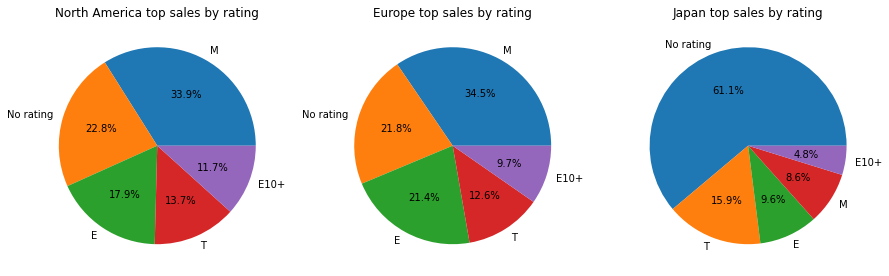

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.pie(NA_rating_grouped['NA_sales'], autopct='%1.1f%%', labels = NA_rating_grouped.index.tolist())
ax1.set_title("North America top sales by rating")
ax2.pie(EU_rating_grouped['EU_sales'], autopct='%1.1f%%', labels = EU_rating_grouped.index.tolist())
ax2.set_title("Europe top sales by rating")
ax3.pie(JP_rating_grouped['JP_sales'],  autopct='%1.1f%%', labels = JP_rating_grouped.index.tolist())
ax3.set_title("Japan top sales by rating")
fig.set_size_inches(15, 9)

<h3> Conclusion by rating ERSB</h3>

In Europe and North America the picture is absolutely the same. The highest sales are for games rated M (Mature 17+), followed by games for everyone, games for teenagers, and games for children over 10 years old. In Japan, most games are not ESRB rated, apparently players from there don't really like Western games. This should be taken into account during an advertising campaign.

<h2> Final portraits by region </h2>

North American user:

- Most popular platforms: PS4, Xbox One, Xbox 360, PS3, 3DS
- Prefers games in the following genres: Shooter, Platformer, Sport, Fighting, Racing
- Doesn't rely heavily on ESRB ratings when selecting games, but preferences lean towards games for mature audiences

User in Europe:

- Most popular platforms: PS4, PS3, PC, Xbox One, 3DS
- Prefers games in the following genres: Racing, Shooter, Sport, Simulator, Platformer
- Doesn't rely heavily on ESRB ratings when selecting games, but preferences lean towards games for mature audiences

User in Japan:

- Most popular platforms: 3DS, PS4, PSV, PS3, WiiU
- Prefers games in the following genres: Puzzle, RPG, Action, Adventure, Fighting
- Please note that games from Western publishers are not very popular in the region

<h2> Hypothesis testing </h2>

To test the hypotheses, we choose the value alpha = 0.05

In [64]:
alpha = 0.05

<h3> Average user ratings for Xbox One and PC platforms are the same </h3>

Since H0 is formed to use the equal sign => in our case, H0 will not differ from the original formulation. In H1, we will assume that the means are not equal, since at this stage we are not interested in which direction the deviation will go (if there is one). As a verification criterion, we will take the p-value obtained using ttest.

H0:Average user ratings for Xbox One and PC platforms are the same

H1:Average user ratings for Xbox One and PC platforms are not equal

When calling the ttest_ind method, we will take the equal_var parameter as False since the size and distribution within samples can vary greatly

In [65]:
xbox_scores = data[data['platform'] == 'XOne']['user_score'].dropna().reset_index(drop = True)
pc_scores = data[data['platform'] == 'PC']['user_score'].dropna().reset_index(drop = True)
t, p = sp.ttest_ind(xbox_scores, pc_scores, equal_var=False)
if p < alpha:
    print(f'Отвергаем гипотезу о равенстве средних пользовательских рейтингов для Xbox One и PC, p-value составило: {round(p, ndigits= 6)}')
else:
    print(f'Не отвергаем гипотезу о равенстве средних пользовательских рейтингов для Xbox One и PC, p-value составило: {round(p, ndigits= 6)}')

Не отвергаем гипотезу о равенстве средних пользовательских рейтингов для Xbox One и PC, p-value составило: 0.116014


We have obtained a result that does not allow us to reject the null hypothesis (i.e. our initial assumption). However, this does not prove its correctness, but only says that the data obtained do not allow us to think otherwise.

<h3>Average user ratings for Action and Sports genres are different</h3>

H0:Average user ratings for Action and Sports genres are the same

H1:Average user ratings for Action and Sports genres are different

In this case, we are talking about the inequality of two means, so it is more convenient to take the opposite of the original hypothesis as the null hypothesis, i.e. equality. If the null hypothesis is true, then we reject the alternative about inequality, that is, our original hypothesis

When calling the ttest_ind method, we will take the equal_var parameter as False since the size and distribution within samples can vary greatly

In [66]:
action_scores = data[data['genre'] == 'Action']['user_score'].dropna().reset_index(drop = True)
sports_scores = data[data['genre'] == 'Sports']['user_score'].dropna().reset_index(drop = True)
t, p = sp.ttest_ind(action_scores, sports_scores, equal_var=False)

if p < alpha:
    print(f'Отвергаем гипотезу о равенстве средних пользовательских рейтингов для жанров Action и Sports, p-value составило: {round(p, ndigits= 6)}')
else:
    print(f'Не отвергаем гипотезу о равенстве средних пользовательских рейтингов для жанров Action и Sports, p-value составило: {round(p, ndigits= 6)}')

Отвергаем гипотезу о равенстве средних пользовательских рейтингов для жанров Action и Sports, p-value составило: 0.0


The probability of getting such or an even greater deviation is millionths of a percent, so we definitely reject the null hypothesis and accept the alternative one about the inequality of user reviews for games of the Action and Sports genres. In other words, based on the data obtained, we have no reason to reject the initial hypothesis about the inequality of user ratings for the Action and Sports genres

<h1> General conclusion </h1>

<h3>Conclusion from preprocessing</h3>


>In 2 columns, the data type was replaced with a more suitable one, almost all columns were renamed for more convenient work with them, a small part of the gaps was discarded (a little more than 1.5% of the total). We were able to find the reason for some of the omissions in the columns with reviews and age ratings (older games almost always lack this data). Added a column with total sales worldwide. What was not done: It was planned to fill in the gaps in the columns with user and critic ratings, but it was not possible to find a suitable replacement method (the only thing that came to mind from the worker was to write a code that would make a request for the name of the game and send data with ratings back. Such data could be obtained from publicly available resources (for example, Wikipedia), but I do not have the necessary skills for this. In the same way, it would be possible to fill in the gaps in the age rating.)

<h3> Conclusion from data analysis </h3>

<h4>Game releases by year</h4>

>We see that every year until 2010 the number of released games grew steadily, but then there was an almost halving decline until 2016. Most likely, from 2010 to 2015, developers changed the main technologies (for example, updated game engines) or, conversely, waited until the market for game consoles and PCs reaches the required technological level.
It is also logical to assume that most of the games from 2005 to 2010 were not produced by large studios, but, on the contrary, by small teams of indie developers (perhaps at that moment applications for creating games became widely popular, allowing you to put together an indie game on your knees in a couple of weeks (to Unfortunately, I don’t see a way to verify this assumption using the available data, but a quick search on the Internet confirms this guess))
In addition, we can now say that the data up to ~1995 is of little interest to us, since very few games were released in those years, and as we previously found out, the information content of this data is minimal (can be left only for viewing platforms popular at that time and genres)

<h4>Relevant platforms</h4>

>The general trend in the gaming market shows that platforms have a relatively short life cycle, averaging about 10 years. The quality of games, not quantity, is the key factor in the popularity of consoles. Advertising companies play an important role in promoting a product, especially for new platforms. New generations of consoles such as Xbox ONE and PS4 have a high priority in advertising campaign planning. Platforms such as 3DS, PSV, PS3, X360 have begun to lose their relevance and should be excluded from advertising campaigns.

<h4> Correlation between reviews and sales </h4>

>The results show that there is no linear relationship between player reviews and game sales, and a weak relationship between critical reviews and sales. However, none of the values ​​reached statistical significance, meaning that accurate predictions cannot be made based on these data.

<h4>Sales analysis by genre</h4>

> The best-selling genres were platformers, shooters, RPGs, fighting games and sports. Often such games are large AAA projects (with the exception of platformers), so such an observation is quite expected. We also see that strategy and adventure games are the worst sellers.

<h3>Portrait of the average user by region</h3>

>North American User:
>
>- Most popular platforms: PS4, Xbox One, Xbox 360, PS3, 3DS
>- Prefers games in the following genres: Shooter, Platformer, Sport, Fighting, Racing
>- Doesn't rely heavily on ESRB ratings when choosing games, but preferences lean towards games for mature audiences
>
>User in Europe:
>
>- Most popular platforms: PS4, PS3, PC, Xbox One, 3DS
>- Prefers games in the following genres: Racing, Shooter, Sport, Simulator, Platformer
>- Doesn't rely heavily on ESRB ratings when choosing games, but preferences lean towards games for mature audiences
>
>User in Japan:
>
>- Most popular platforms: 3DS, PS4, PSV, PS3, WiiU
>- Prefers games in the following genres: Puzzle, RPG, Action, Adventure, Fighting
>- It should be noted that games from Western publishers are not very popular in the region

<h3> Hypothesis testing </h3>

<h4> Average user ratings for Xbox One and PC platforms are the same </h4>

>*H0:Average user ratings for Xbox One and PC platforms are the same*
>
>*H1:Average user ratings for the Xbox One and PC platforms are not equal*
>
>We have obtained a result that does not allow us to reject the null hypothesis (i.e. our initial assumption). However, this does not prove its correctness, but only says that the data obtained do not allow us to think otherwise.

<h4>Average user ratings for Action and Sports genres are different</h4>

*H0:Average user ratings for Action and Sports genres are the same*
>
>*H1:Average user ratings for Action and Sports genres are different*
>
>We reject the hypothesis of equality of average user ratings for the Action and Sports genres, p-value was: 5e-06
>The probability of getting such or an even greater deviation is millionths of a percent, so we definitely reject the null hypothesis and accept the alternative one about the inequality of user reviews for games of the Action and Sports genres. In other words, based on the data obtained, we have no reason to reject the initial hypothesis about the inequality of user ratings for the genres >Action and Sports

<h3>What are we advertising</h3>

First of all, it is worth giving priority to users from North America and Europe, since these regions account for the majority of sales. In terms of platforms, you should give preference to new favorites: PS4 and XOne. You can take a platform game or a sports game, but a shooter seems to be the best choice. It is also worth choosing games for an adult audience, or without an age rating at all, but this has a big impact. Also, when choosing, you should look at reviews from critics, but this should not be a decisive factor, but you definitely shouldn’t judge possible sales based on user reviews.